1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

[ 0.10383031 -0.82126346] [-1.70788983  0.87845826] [ 1.70791065 -0.87845746] [0. 0.] [-0.10378405  0.8212641 ]
minima    (x_min, y_min) -----> f(x_min,y_min)
first minima() [ 0.10383031 -0.82126346] -0.6347396517415296
second minima() [-1.70788983  0.87845826] 0.028630204576291174
third minima() [ 1.70791065 -0.87845746] 0.02863021739645044
fourth minima() [0. 0.] 0.0
fifth minima() [-0.10378405  0.8212641 ] -0.6347396434847934


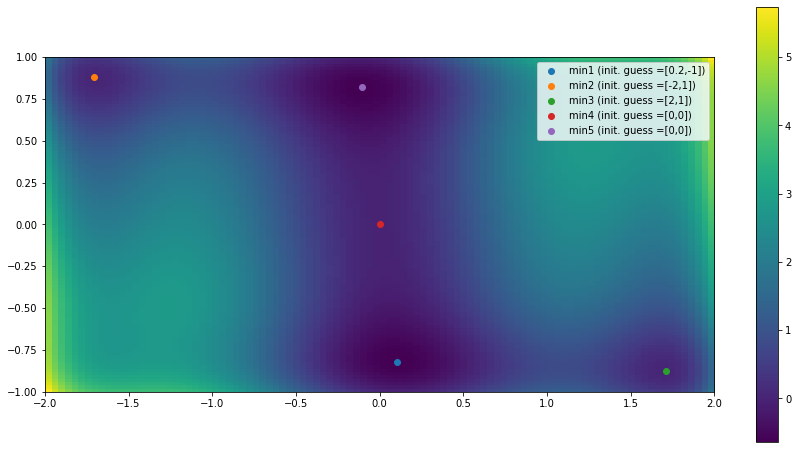

In [33]:
import scipy as sp
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def f(w):
    x=w[0]
    y=w[1]
    return (4 - 2.1 * x**2 + x**4 /3) * x**2 +x*y + (4* y**2 - 4) * y**4

min1 = optimize.minimize(f, [0.2,-1], method='Powell')
min2 = optimize.minimize(f,[-2,1], method='Nelder-Mead')
min3 = optimize.minimize(f,[2,1], method='Nelder-Mead')
min4 = optimize.minimize(f,[0,0], method='CG')
min5 = optimize.minimize(f, [0,0], method='Nelder-Mead')
print(min1.x, min2.x , min3.x, min4.x, min5.x)
print('minima    (x_min, y_min) -----> f(x_min,y_min)')

print('first minima()',min1.x, min1.fun)
print('second minima()',min2.x, min2.fun)
print('third minima()',min3.x, min3.fun)
print('fourth minima()',min4.x, min4.fun)
print('fifth minima()',min5.x, min5.fun)


x0 = np.linspace(-2, 2, 100)
x1 = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x0,x1)

fig = plt.figure(figsize=[15,8])
plt.imshow(f([X,Y]), extent=[-2,2,-1,1], origin='lower')
plt.colorbar()

plt.scatter(min1.x[0],min1.x[1], label='min1 (init. guess =[0.2,-1])')
plt.scatter(min2.x[0],min2.x[1], label='min2 (init. guess =[-2,1])')
plt.scatter(min3.x[0],min3.x[1], label='min3 (init. guess =[2,1])')
plt.scatter(min4.x[0],min4.x[1], label='min4 (init. guess =[0,0])')
plt.scatter(min5.x[0],min5.x[1], label='min5 (init. guess =[0,0])')

plt.legend()

To find all the minimum, I try to change the method of spipy.optimize() and the initial guess in order to reach all the diffrent 5 minima. I found 2 global minima (purple and blue) and 3 local minima. 
However the red minima is not properly a minima but it's due to the initial guess that is [0,0] (as one can see from the figure below).

Text(0.5, 0.92, 'Function')

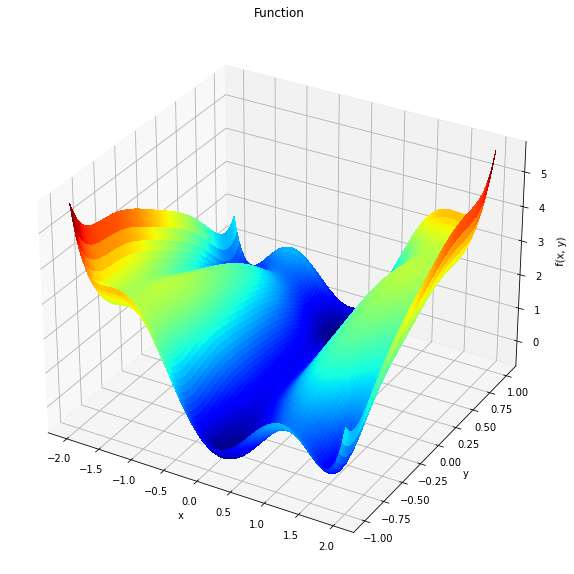

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, f([X,Y]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Function')


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

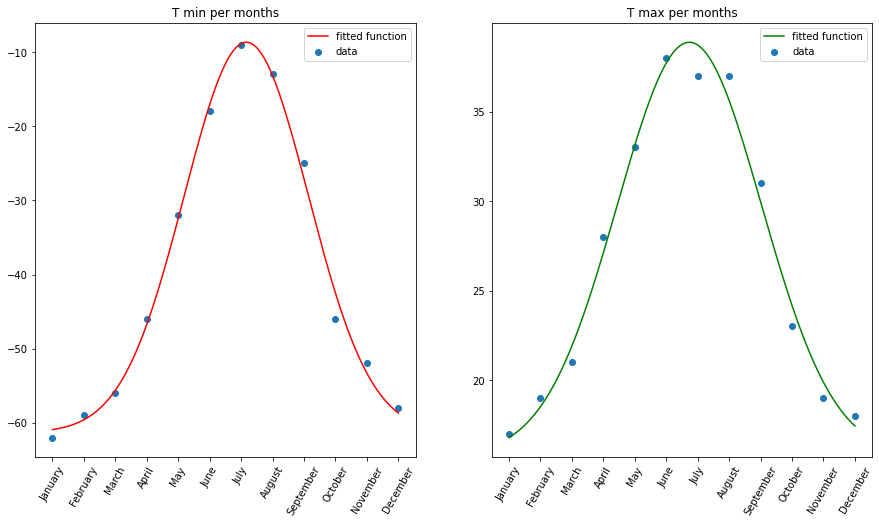

In [35]:
from scipy.optimize import curve_fit
import calendar

months_name=calendar.month_name[1:]
max = (17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18)
min = (-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax1.scatter(months_name,min, label='data')
ax1.set_title('T min per months')
ax1.tick_params(axis='x', which='major', rotation=60 )
ax2.scatter(months_name,max, label='data')
ax2.set_title('T max per months')
ax2.tick_params(axis='x', which='major', rotation=60 )


def gaussian(x, A, mu, sigma, offset):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * sigma**2)) + offset
x=np.linspace(0,11,1000)
months = [i for i in range(12)]

popt_min, pcov_min = curve_fit(gaussian, months, min, p0=[1,2,3,4],full_output=False)
ax1.plot(x, gaussian(x, *popt_min),label='fitted function', color='red')
ax1.legend()

popt_max, pcov_max = curve_fit(gaussian,months, max, p0=[1,2,3,4],full_output=False)
ax2.plot(x, gaussian(x, *popt_max),label='fitted function', color='green')
ax2.legend()




In [36]:
"""To estimate to goodness of the fitting one can calculate the correlation coefficient"""
ssr_min = np.sum((min - gaussian(months,*popt_min))**2)
tss_min = np.sum((np.mean(min) - min ) **2)

rsq_min = 1 - ssr_min / tss_min
print("The correlation coefficient of the T min")
print("R**2 =", rsq_min, "\nR =", np.sqrt(rsq_min))

ssr_max = np.sum((max - gaussian(months,*popt_max))**2)
tss_max= np.sum((np.mean(max) - max ) **2)

rsq_max = 1 - ssr_max / tss_max
print("The correlation coefficient of the T max")
print("R**2 =", rsq_max, "\nR =", np.sqrt(rsq_max))
"""Since they both are close to one, it's seems reasonable"""

The correlation coefficient of the T min
R**2 = 0.9946041936397214 
R = 0.9972984476272494
The correlation coefficient of the T max
R**2 = 0.9858796078351143 
R = 0.9929147032022007


"Since they both are close to one, it's seems reasonable"

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [37]:
import pandas as pd
import numpy as np

data = np.load("residuals_261.npy", allow_pickle=True)
df = pd.DataFrame(data.item())
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


<class 'numpy.ndarray'>


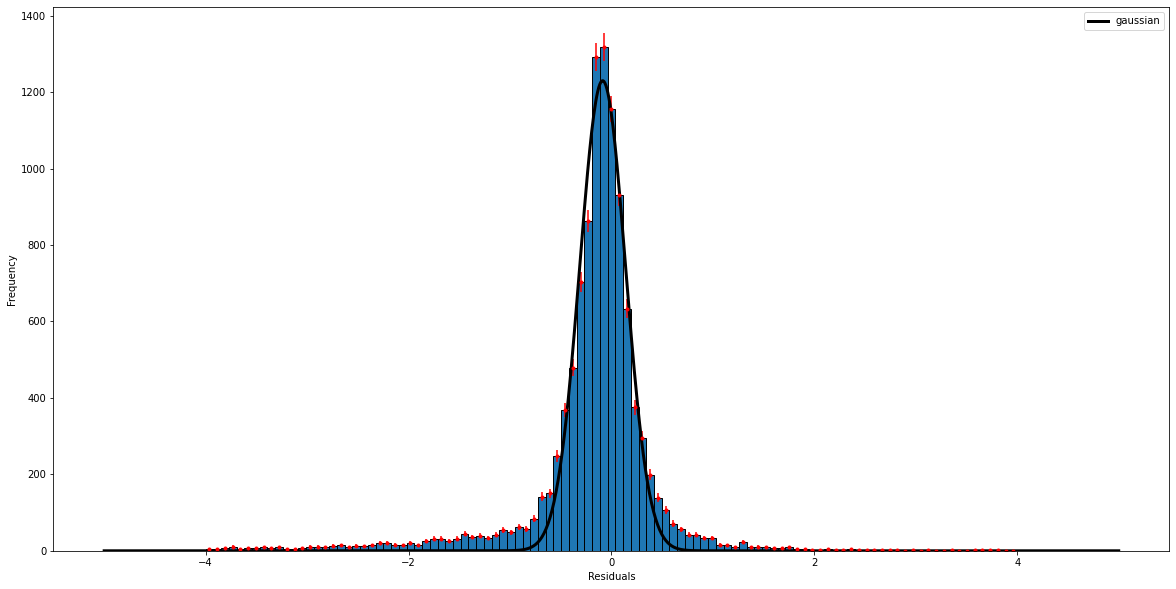

In [42]:
import matplotlib.pyplot as plt

# res_df = df['residuals']
bin = int(np.sqrt(len(df['residuals'])))

fig, ax = plt.subplots(figsize=(20,10))
p, bin_edges, _ = ax.hist(df['residuals'], bin, color='tab:blue' , edgecolor='black' , range= (-4,4))
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2

sigmas = np.sqrt(p)
plt.errorbar(bin_centers, p , sigmas, fmt='r.')

from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * sigma**2))
popt_gauss, pcov_gauss = curve_fit(gaussian, bin_centers, p , p0=[1600,0,0.5],full_output=False)

x = np.linspace(-5,5,1000)
ax.plot(x, gaussian(x, *popt_gauss ), color='black', label='gaussian', lw=3)

from scipy.special import voigt_profile #parameters (x, sigma, gamma)

# popt_voigt, pcov_voigt = curve_fit(voigt_profile, bin_centers, p , p0=[100,1],full_output=False)
# ax.plot(x, voigt_profile(x, *popt_voigt ), color='red', label='Voigt function', lw=3)
ax.legend()



In [39]:
#calculating the p-value
from scipy import stats

ndof = len(bin_centers) - 2 #degrees of freedom
chi2 = np.sum( (p - gaussian(bin_centers, *popt_gauss)) / 2 )

p_value = 1.0 - stats.chi2.cdf(chi2, ndof)
chi2
p_value


0.0

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

         time       Temp
0  1995.00274   0.944444
1  1995.00548  -1.611110
2  1995.00821  -3.555560
3  1995.01095  -9.833330
4  1995.01369 -10.222200


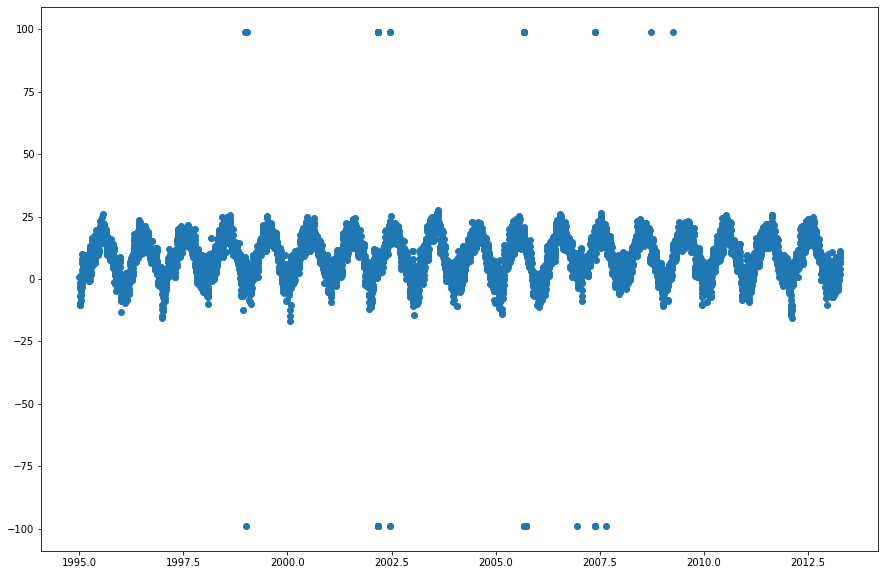

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df =  pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
df.columns = ["time", "Temp"]

print(df.head())

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df["time"], df["Temp"])


<ipython-input-48-064b0b473409>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[mask2]


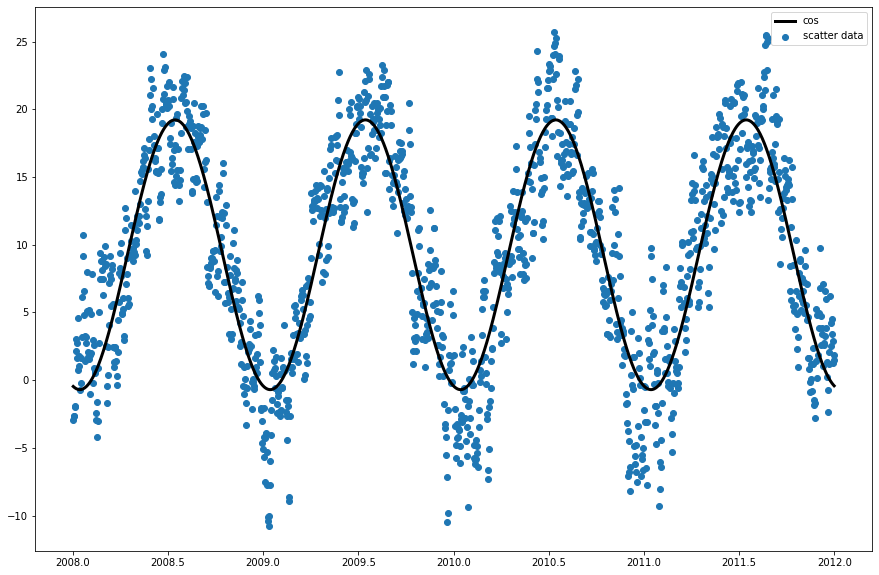

In [48]:
mask = ( 2008 <= df["time"])
mask2 = (df["time"] <= 2012)
data = df[mask]
data = data[mask2]
data = data[np.abs(data["Temp"]) < 60] #I don't think that in Berlin there are temperature above \pm 60 degrees

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(data["time"], data["Temp"], label='scatter data')

from scipy.optimize import curve_fit

def cosine(x,a,b,c):
    from numpy import cos, pi
    return a*cos(2*pi*x + b) + c

# time = np.array(data["time"])
# Temp = np.array(data["Temp"])
popt_f , pcov_f  = curve_fit(cosine, data["time"], data["Temp"], p0=[1,2,3])
ax.plot(data["time"], cosine(data["time"], *popt_f ), color='black', label='cos', lw=3)
ax.legend()
    

Mathematically, the parameter b is a traslation over x (horizontal traslation) of the cosine curve. Physically this parameter should be call "season parameter" since its value can put the summer temperature in the winter period for example, always thinking about the traslation.

In [43]:
print(f'The overall average Temperature in Berlin is : {df["Temp"].mean()}')

"""Since every year have almost the same Temperature, I take in account only the years: from 2008 and 2010  """

min = data[data["Temp"] == data["Temp"].min()]
year_min = min["time"].item()
Temp_min = min["Temp"].item()

print(f'The minimum is {year_min} and temperature {Temp_min}')
print(f'the expectation value (predicted by the cosine funciont) is: {cosine(year_min, *popt_f)}')


min = data[data["Temp"] == data["Temp"].max()]
year_max = min["time"].item()
Temp_max = min["Temp"].item()

print(f'The maximum is {year_max} and temperature is {Temp_max}')
print(f'the expectation value (predicted by the cosine funciont) is: {cosine(year_max, *popt_f)}')



The overall average Temperature in Berlin is : 8.941907038598593
The minimum is 2009.03012 and temperature -10.7778
the expectation value (predicted by the cosine funciont) is: -0.6889583033181417
The maximum is 2010.52841 and temperature is 25.7222
the expectation value (predicted by the cosine funciont) is: 19.2091712442041


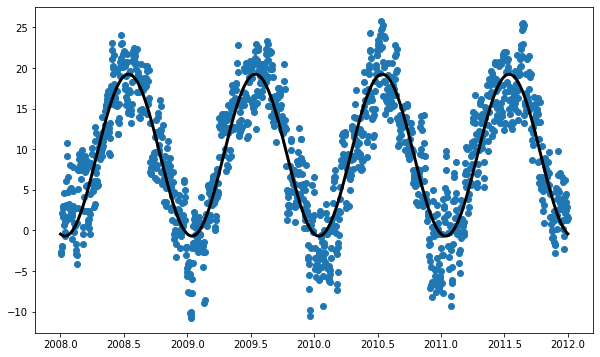

In [61]:
def cosine2(x, a,b,c,d):
    from numpy import cos, pi
    return a*cos(2*pi*b*x + c) + d

popt_f , pcov_f  = curve_fit(cosine2, data["time"], data["Temp"], p0=[17,1,1,5])
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["time"], data["Temp"], label='scatter data')
ax.plot(data["time"], cosine2(data["time"], *popt_f ), color='black', label='cos2', lw=3)

